# Task 2 : Exploratory Data Analysis - Titanic Dataset

# Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the Dataset
titanic = pd.read_csv('Titanic-Dataset.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic.shape

(891, 12)

In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Information about Columns

1. PassengerId: unique id number to each passenger
2. Survived: passenger survive(1) or died(0)
3. Pclass: passenger class
4. Name: name
5. Sex: gender of passenger
6. Age: age of passenger
7. SibSp: number of siblings/spouses
8. Parch: number of parents/children
9. Ticket: ticket number
10. Fare: amount of money spent on ticket
11. Cabin: cabin category
12. Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [7]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Preprocessing and Data Cleaning

In [9]:
titanic.duplicated().sum()

0

In [10]:
# checking for null values
nv = titanic.isna().sum().sort_values(ascending=False)
nv = nv[nv>0]
nv

Cabin       687
Age         177
Embarked      2
dtype: int64

In [11]:
titanic.isnull().sum().sort_values(ascending=False)*100/len(titanic)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [12]:
# Since Cabin Column has more than 75 % null values .So , we will drop this column
titanic.drop(columns = 'Cabin', axis = 1, inplace = True)
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [13]:
# Filling Null Values in Age column with mean values of age column
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

# filling null values in Embarked Column with mode values of embarked column
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)


In [14]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Checking for unique values

In [15]:
# Finding no. of unique values in each column of dataset
titanic[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']].nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             89
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [16]:
titanic['Survived'].unique()

array([0, 1], dtype=int64)

In [17]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [19]:
titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

# Dropping Some Unnecessary Columns


In [20]:
titanic.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [21]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
titanic.describe(include='O')

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


# Data Visualization

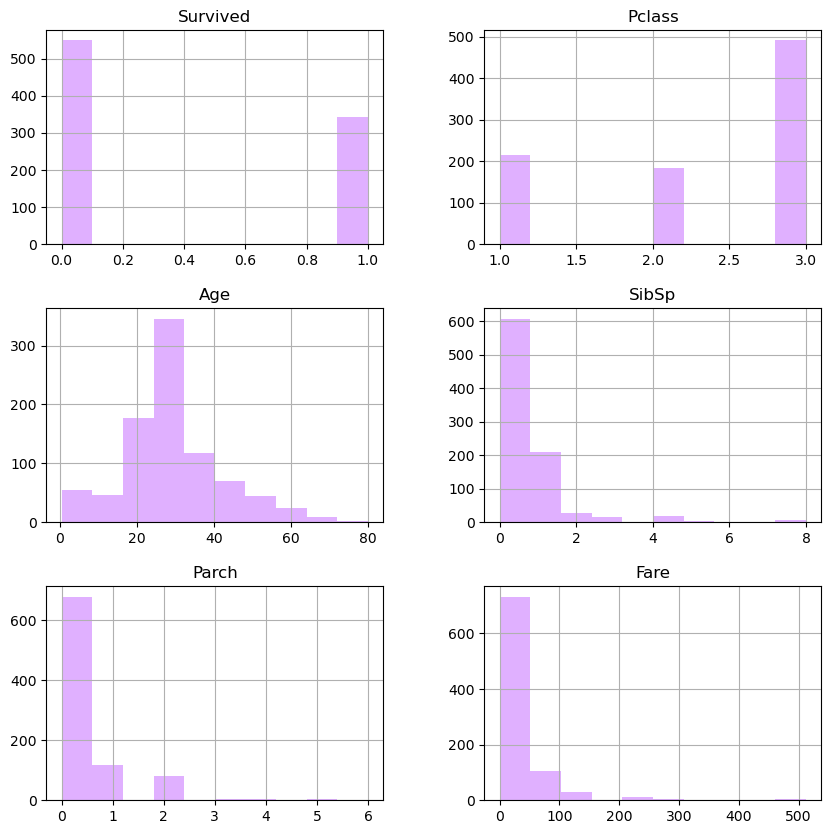

In [24]:
# Plotting Histplot for Dataset
titanic.hist(figsize=(10,10),color='#E0B0FF')
plt.show()

## Plotting CountPlot for categorical columns

In [27]:
cat_cols = titanic.select_dtypes(include='object').columns
cat_cols

Index(['Sex', 'Embarked'], dtype='object')

male      577
female    314
Name: Sex, dtype: int64


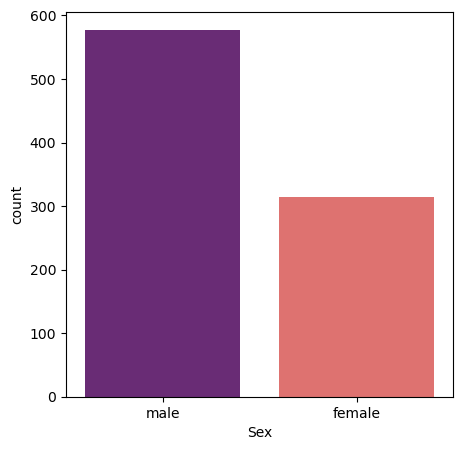

S    646
C    168
Q     77
Name: Embarked, dtype: int64


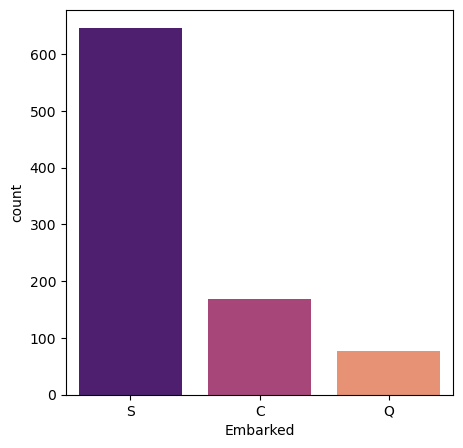

In [28]:
for i in cat_cols:
    print(titanic[i].value_counts())
    plt.figure(figsize=(5,5))
    sns.countplot(x=titanic[i],palette='magma')
    plt.xlabel(i)
    plt.show()

# Sex Column

In [29]:
d1 = titanic['Sex'].value_counts()
d1

male      577
female    314
Name: Sex, dtype: int64

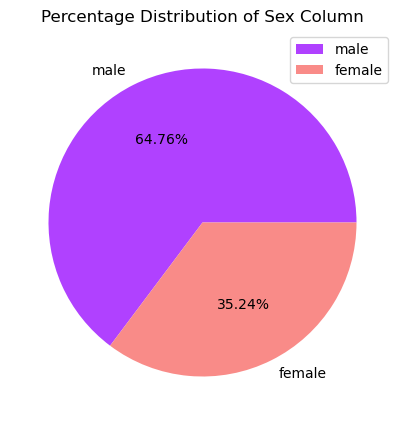

In [30]:
# Plotting Percantage Distribution of Sex Column
plt.figure(figsize=(5,5))
plt.pie(d1.values,labels=d1.index,autopct='%.2f%%',colors=['#B041FF','#F98B88'])
plt.title('Percentage Distribution of Sex Column')
plt.legend()
plt.show()

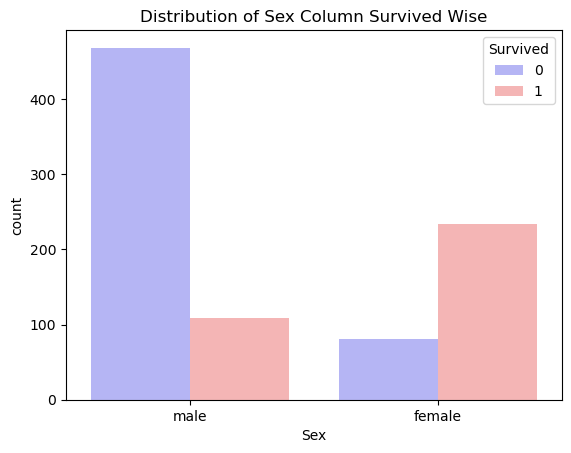

In [31]:
# Showing Distribution of Sex Column Survived Wise
sns.countplot(x=titanic['Sex'],hue=titanic['Survived'],palette = 'bwr') # In Sex (0 represents died and 1 represents survived)
plt.title('Distribution of Sex Column Survived Wise')
plt.show()

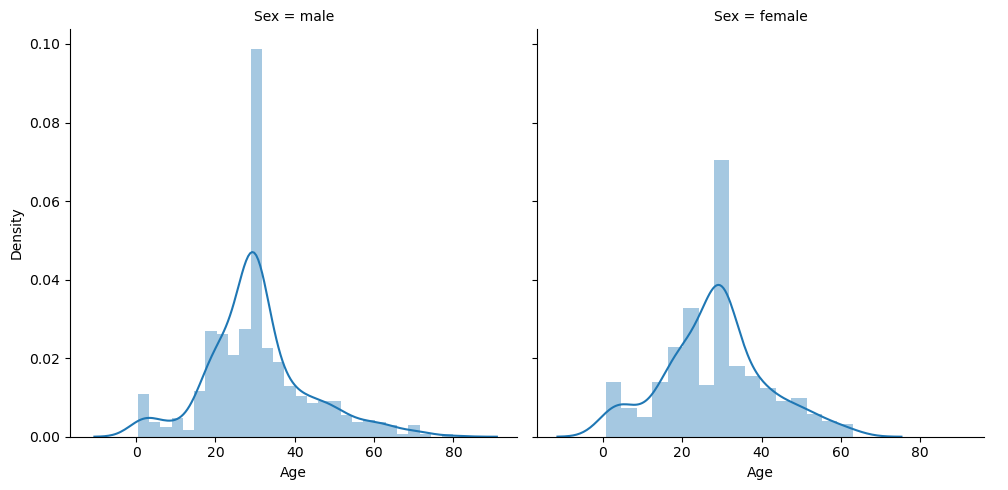

In [32]:
d2 = sns.FacetGrid(titanic, col="Sex",height=5)
d2 = (d2.map(sns.distplot, "Age").add_legend())

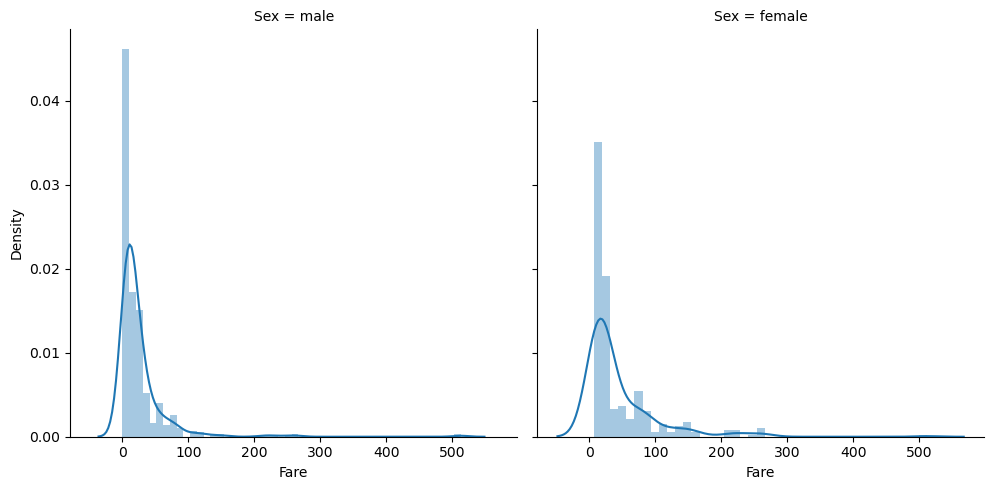

In [33]:
d3 = sns.FacetGrid(titanic, col="Sex",height=5)
d3 = (d3.map(sns.distplot, "Fare").add_legend())

# Plotting Correlation Plot

In [34]:
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


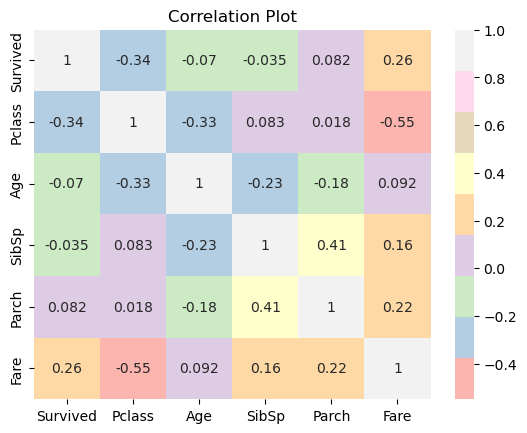

In [35]:
# Showing Correlation Plot
sns.heatmap(titanic.corr(),annot=True,cmap='Pastel1')
plt.title('Correlation Plot')
plt.show()

# Plotting pairpot

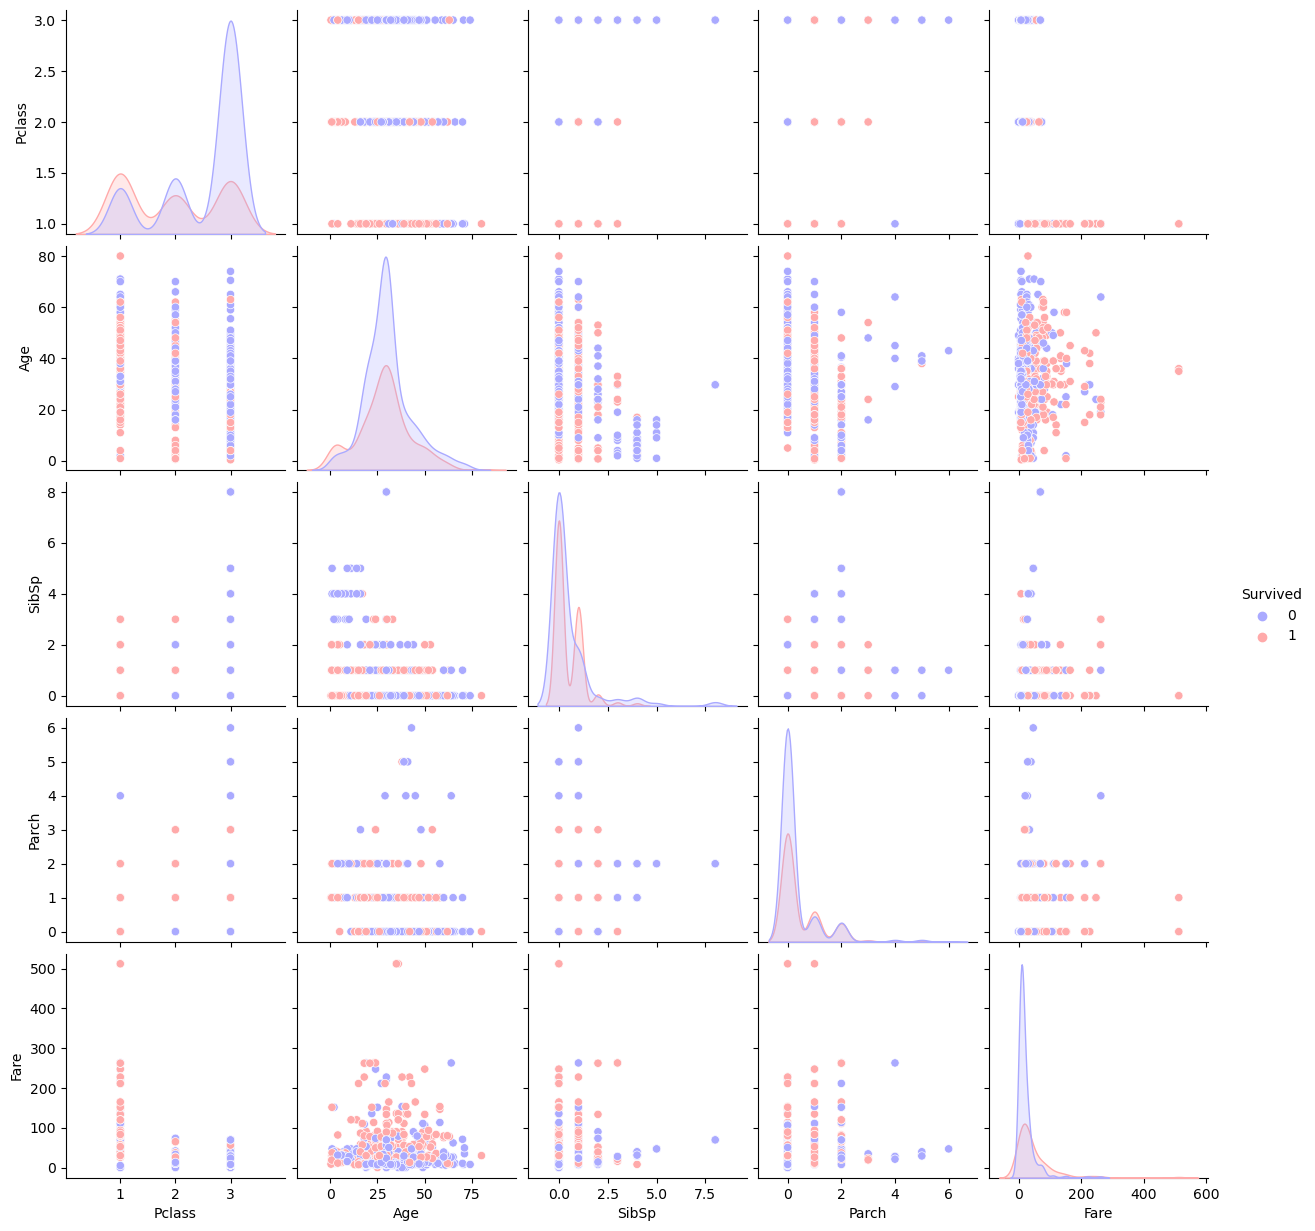

In [36]:
# Plotting pairplot
sns.pairplot(titanic,hue='Survived',palette='bwr')
plt.show()